# Статистика, DS-поток
## Задание SP.4

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  50 баллов
* Задача 2 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средне-высокая:* задача 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


In [1]:
# Bot check

# HW_ID: ds_sp4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
from scipy.stats import expon
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

sns.set(font_scale=1.5, palette='Set2')

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [3]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

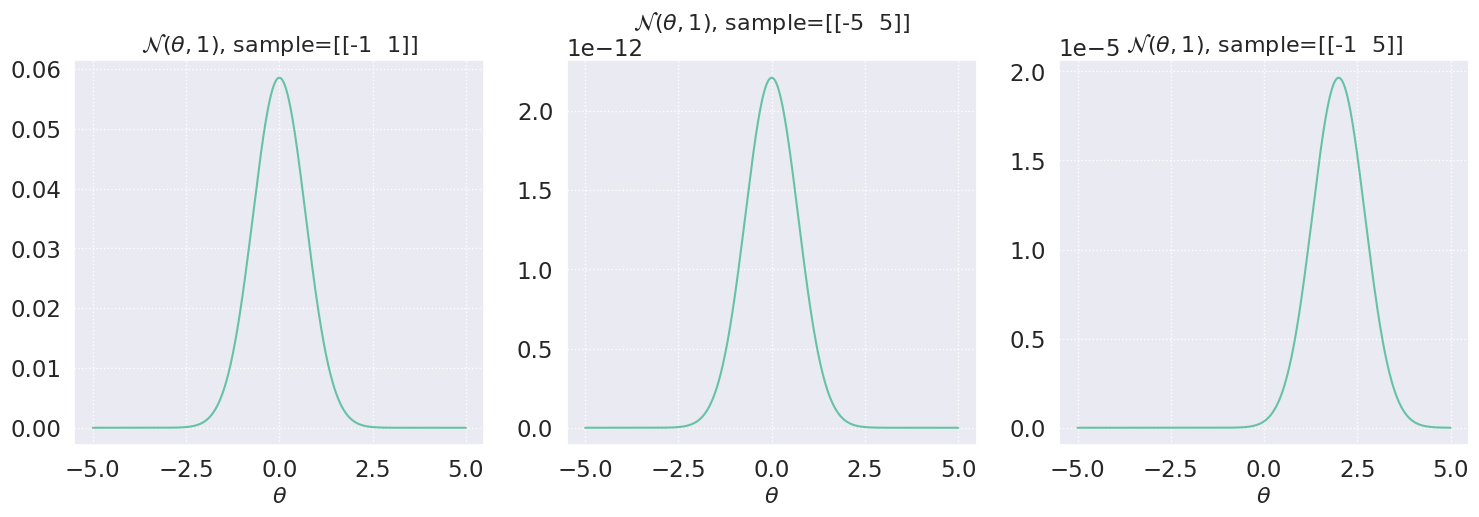

In [4]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

/home/ubaca/Projects/Jupyter/JupyterVenv/lib64/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


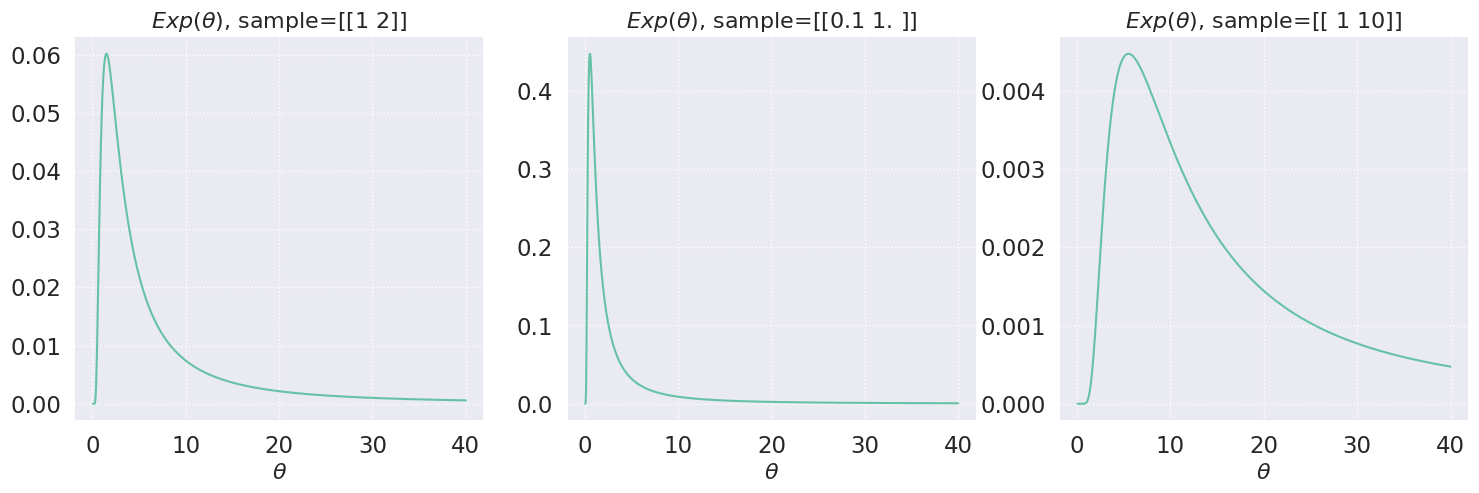

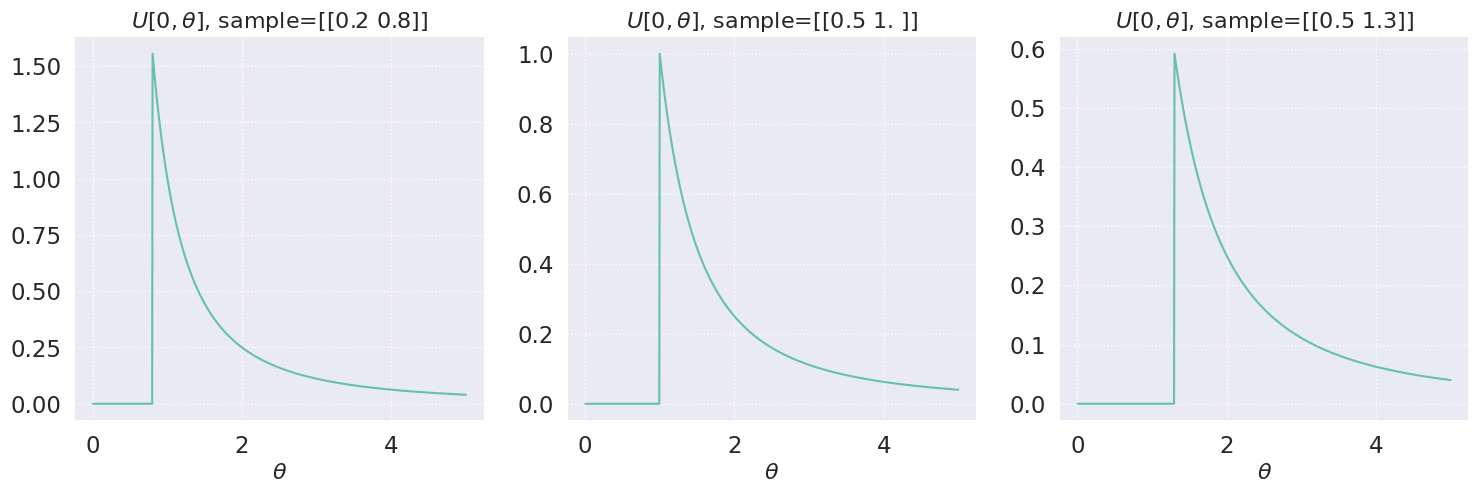

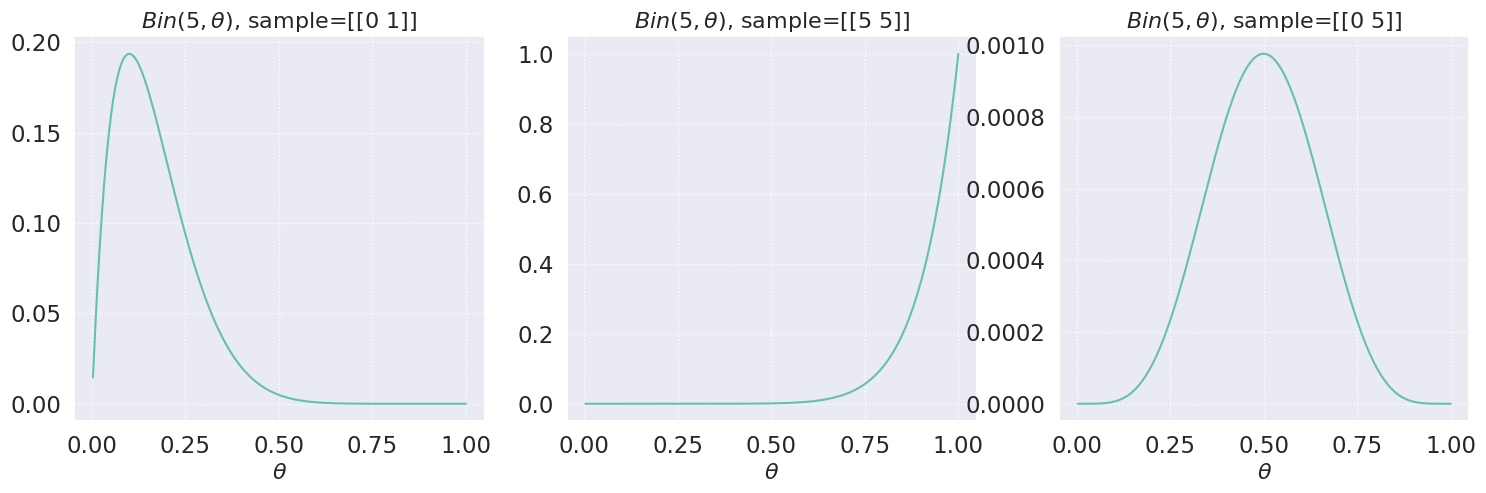

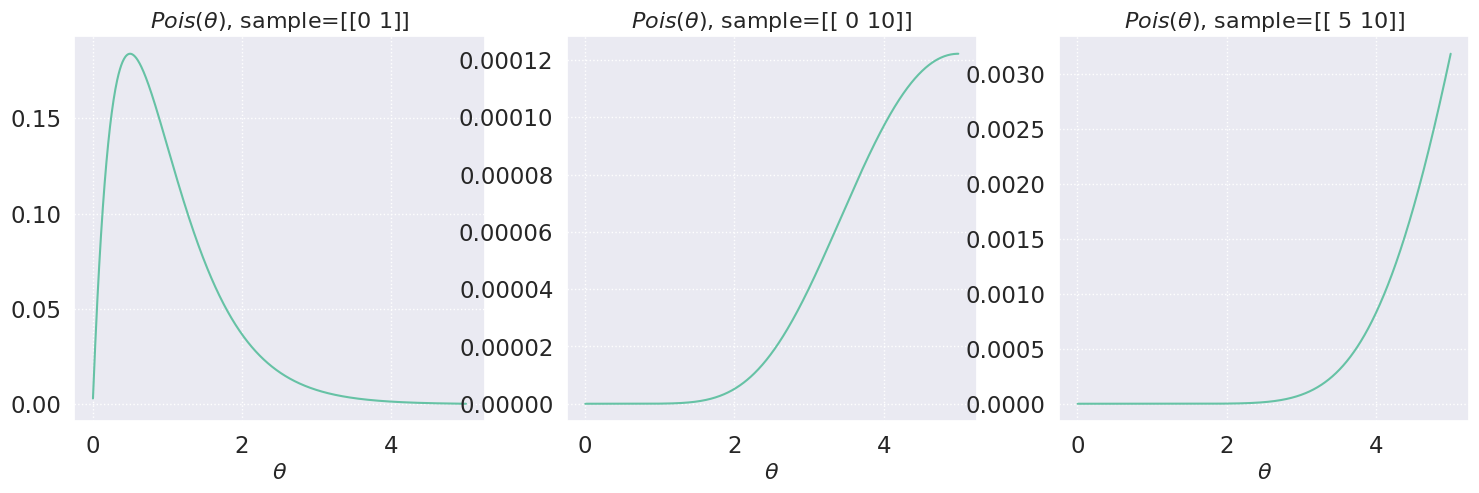

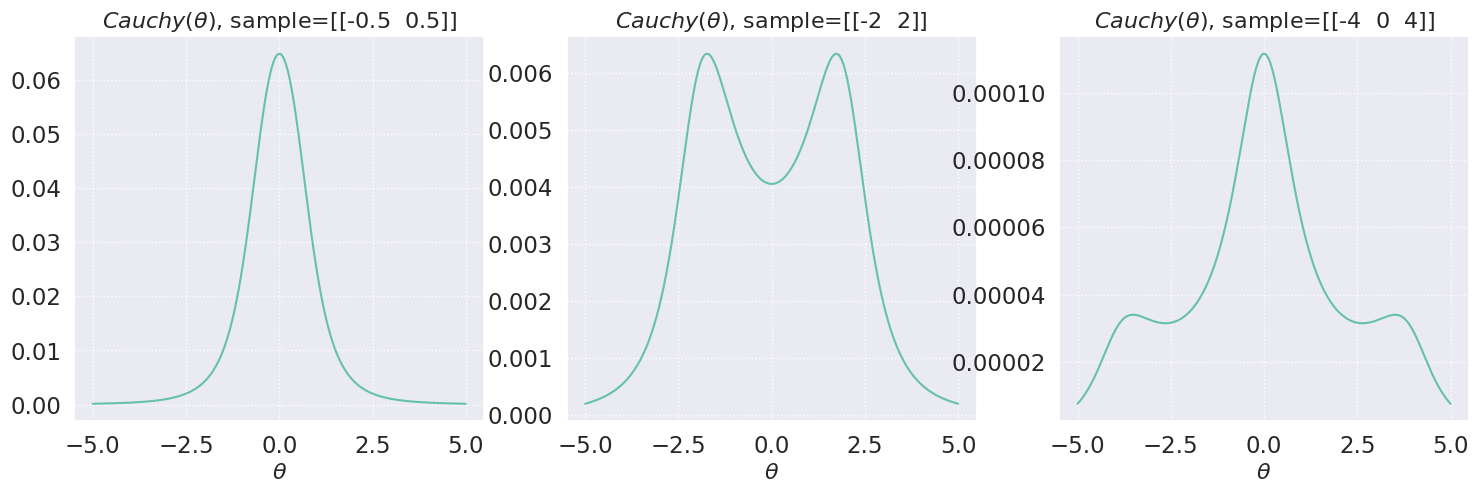

In [5]:
grid = np.linspace(-5, 40, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

grid = np.linspace(-1, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Cauchy(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

1) Нормальное: функция правдоподобия напоминает колокол, максимальное значение близко к среднему по выборке, график симметричный. Чем меньше разброс значений в выборке, тем уже колокол

2) Экспоненциальное: Ассиметричный график с максимумом, далее убывает к нулю. При больших значениях элементов в выборке график растягивается и сдвигается правее. 

3) Равномерное: Резкий рост ступеньки а потом монотонный спад. С ростом разброса в выборке растягивается график

4) Биномиальное: Если маленькие значения выборки, то максимум сдвигается влево, иначе вправо. Графики ассиметричные, максимума может и не быть ( в том смысле, что по середине)

5) Пуассоновское: Аналогично биномиальному

6) Коши: симметричный, однако пик не обязательно посередине, их может быть и два, если разброс в выброке растет, и нет значений посередине

Функция правдоподобия не является плотностью, потому что она не нормирована (и не должна быть нормирована), ее значения просто пропорциональны 

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [6]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Функция правдоподобия перемножает большое число вероятностей <1, и при больших зачений выборки это будет нуль.
Можно использовать логарифм функции правдоподобия

In [7]:
log_likelihood = np.sum(sps.norm.logpdf(sample, loc=1, scale=1))

print("Логарифм функции правдоподобия:", log_likelihood)

Логарифм функции правдоподобия: -192229.342065957


______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов для всей выборки $Y$.
3. Найти ОМП по дискретизованной выборке $Y$, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

1) Подвыборка $Y_i < c$ размера $k$:

$$p_{\theta}(y | y < c) = \frac{p_{\theta}(y)}{\mathbb P(Y < c)} = \frac{\theta e^{-\theta y}}{1 - e^{-\theta c}}$$

$$\log L = k \log \theta - k \log(1 - e^{-\theta c}) - \theta \sum_{i=0}^k Y_i$$

$$\partial_\theta L = \frac{k}{\theta} + \frac{c \theta ke^{-\theta c}}{1 - e^{-\theta c}} - \theta \sum_{i=0}^k Y_i = 0 $$

Решая уравнение находим $\hat \theta$

2) Метод моментов:

$$\mathbb E [\min(X_i, c)] = \int_0^c x p_{\theta}(x) dx + c \int_c^{\infty} p_{\theta}(x) dx = \frac{1}{\theta}(1 - \exp(-\theta c))$$

$$\overline Y = \frac{1}{\hat \theta}(1 - \exp(-\hat \theta c))$$

3) Бины:

Вероятность попасть в $i$-й, $i \leq k$:
$$p_i = \int_{a_i}^{a_{i+1}} p_{\theta}(y)dy = \theta(e^{-\theta a_i}-e^{-\theta a_{i+1}})$$

$$p_{k+1} = \theta e^{-\theta c}$$

$$l_\theta = \sum_i \ln p_i \rightarrow \max$$

$$\hat \theta = argmax_{\theta} \sum_i \ln p_i $$

In [52]:
def loss_function(X, Y):
    """
    Функция разности между theta, Y для минимизации
    """
    return np.sum((X - Y) ** 2)

def first_likelihood(theta, Y_c, c):
    """
    Вычисляет функцию логарифм
    функции правдоподобия для метода 1
    """
    k = len(Y_c)

    return -( k * np.log(theta)  - k * np.log(1 - np.exp(- theta * c)) - np.sum(Y_c) * theta)


def first_method(Y, c):
    """ 
    Оценка ОМП методом 1
    """
    Y_c = Y[Y < c]
    
    def objective_function(theta):
        return loss_function(first_likelihood(theta, Y_c, c), 0)
    
    start = 0.1
    result = minimize(objective_function, start, bounds=[(1e-3, 1e3)])
    
    return result.x[0]

def expected_value(theta, c):
    """
    Вычисляет математическое ожидание для метода 2
    """
    return (1 - np.exp(-theta * c)) / theta

def loss_function(X, Y):
    """
    Функция разности между theta, Y для минимизации
    """
    return np.sum((X - Y) ** 2)

def second_method(Y):
    """
    Оценивает параметр theta методом моментов 2
    """
    Y_mean = np.mean(Y)
    
    def objective_function(theta):
        return loss_function(expected_value(theta, c), Y_mean)
    
    start = 0.1
    result = minimize(objective_function, start, bounds=[(1e-3, 1e3)])
    
    return result.x[0]

def third_log_likelihood(theta, Y, bins, c):
    """
    Функция для вычисления логарифмической функции правдоподобия
    для третьего метода.
    """
    #Z = np.digitize(Y, bins, right=False)
    #counts = np.bincount(Z, minlength=len(bins) + 1)
    counts = np.histogram(Y, bins=bins)[0]
    
    a_i = bins[:-1]
    a_next = bins[1:]
    p = np.zeros(len(bins))
    
    p[:-1] = theta * (np.exp(-theta * a_i) - np.exp(-theta * a_next))
    p[-1] = theta * np.exp(-theta *c)
    
    ll_bins = np.where(p > 0, np.log(p), 0)
    
    ll_total = np.sum(counts * ll_bins[:-1]) + (len(Y) - np.sum(counts)) * ll_bins[-1]
    
    return ll_total
    
def third_method(Y, c):
    """
    Оценивает по третьему методу
    """
    bins = np.arange(0, c)
    
    #Z = np.digitize(Y, bins, right=False)
    
    def objective_function(theta):
        return -third_log_likelihood(theta, Y, bins, c)
        
    start = 0.1
    result = minimize(objective_function, start, bounds=[(1e-5, None)])
    
    return result.x[0]


/tmp/ipykernel_54428/1556782995.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[-1] = theta * np.exp(-theta *c)


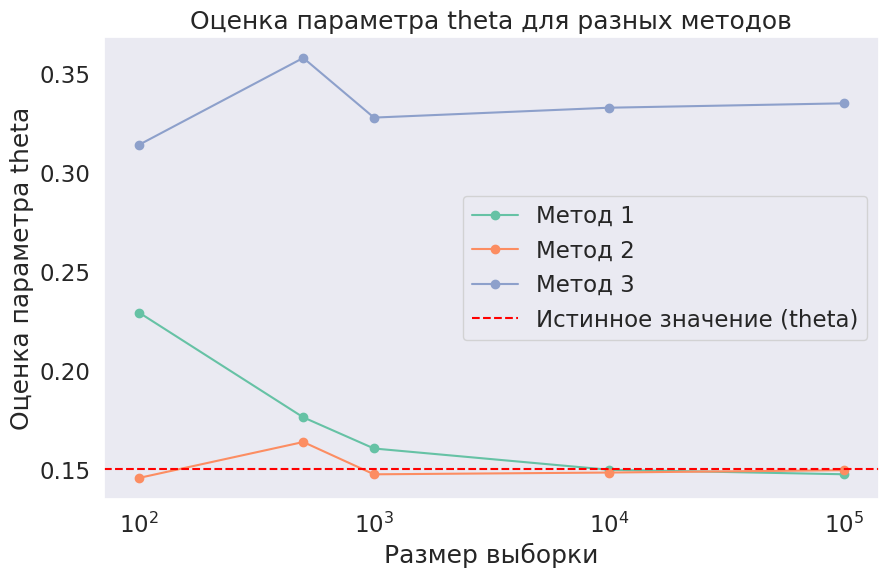

In [53]:
c = 10
theta_true = 0.15
n_samples_list = [100, 500, 1000, 10000, 100000]  # Разные размеры выборок

theta_1_estimates = []
theta_2_estimates = []
theta_3_estimates = []

for n_samples in n_samples_list:
    X = sps.expon(scale=1/theta_true).rvs(size=n_samples)
    Y = np.minimum(X, c)

    theta_1 = first_method(Y, c)
    theta_2 = second_method(Y)
    theta_3 = third_method(Y, c)

    theta_1_estimates.append(theta_1)
    theta_2_estimates.append(theta_2)
    theta_3_estimates.append(theta_3)

plt.figure(figsize=(10, 6))
plt.plot(n_samples_list, theta_1_estimates, marker='o', label='Метод 1')
plt.plot(n_samples_list, theta_2_estimates, marker='o', label='Метод 2')
plt.plot(n_samples_list, theta_3_estimates, marker='o', label='Метод 3')
plt.axhline(y=theta_true, color='r', linestyle='--', label='Истинное значение (theta)')
plt.xscale('log')
plt.xlabel('Размер выборки')
plt.ylabel('Оценка параметра theta')
plt.title('Оценка параметра theta для разных методов')
plt.legend()
plt.grid()
plt.show()

**Вывод:** 

1-2 методы сходятся примерно одинаково, третий не сходится

Можно использовать методы, изученные на лекциях ранее для оценки параметров в реальной аналитической задаче